create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of population1 should be 0.2 and the p-value of population2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# Generate a binomial distribution. 
# p = the probability of getting k successes during n repetitions of the event
np.random.seed(1)
population1 = np.random.binomial( n=10,p=0.2, size = 10000 )

population2 = np.random.binomial( n=10,p=0.5, size = 10000 )

print('mean:',population1.mean())
print('std:',population1.std(ddof=0))
print('mean:',population2.mean())
print('std:',population2.std(ddof=0))

mean: 1.9901
std: 1.25618549188
mean: 5.0128
std: 1.58519278323


In [94]:
np.random.seed(1)
s1 = np.random.choice(population1 , size = 100 , replace = False)
s2 = np.random.choice(population2 , size = 100 , replace = False)

In [95]:
print('mean:',s1.mean())
print('std:',s1.std())

print('mean:',s2.mean())
print('std:',s2.std())

mean: 1.95
std: 1.18638105177
mean: 5.12
std: 1.49184449592


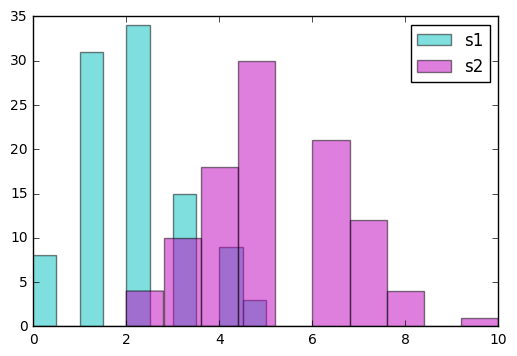

In [96]:
plt.hist(s1 ,alpha = 0.5 , color = 'c' , label = 's1')
plt.hist(s2 ,alpha = 0.5 , color = 'm' , label = 's2')
plt.legend(loc='upper right')
plt.show()

In [97]:
# Calculate differences in the means:
diff_2_1 = s2.mean() - s1.mean()
print(diff_2_1)

3.17


In [118]:
from scipy.stats import ttest_ind
print(ttest_ind(s2, s1, equal_var=False))

Ttest_indResult(statistic=16.547720758110582, pvalue=1.43287278789352e-38)


--------------------------

1.Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

In [98]:
np.random.seed(1)
s3 = np.random.choice( population1, size = 1000 , replace=False )
s4 = np.random.choice( population2, size = 1000 , replace=False )

In [99]:
# create a dataframe with 2 columns: s3 and s4:
sample_1000 = pd.DataFrame( {'s3': s3, 's4':s4 } ,columns=['s3','s4'] )
# sample

In [100]:
print('mean:',s3.mean())
print('std:',s3.std())
print('mean:',s4.mean())
print('std:',s4.std())

mean: 2.041
std: 1.29434114514
mean: 4.985
std: 1.58391129802


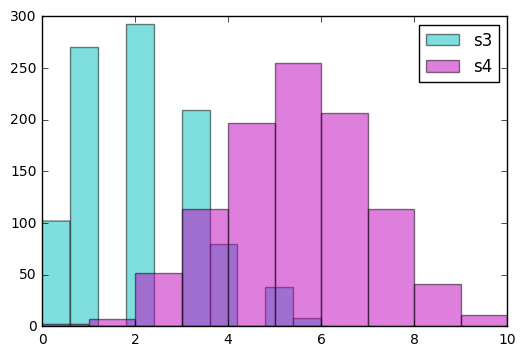

In [101]:
plt.hist(s3 ,alpha = 0.5 , color = 'c' , label = 's3')
plt.hist(s4 ,alpha = 0.5 , color = 'm' , label = 's4')
plt.legend(loc='upper right')
plt.show()

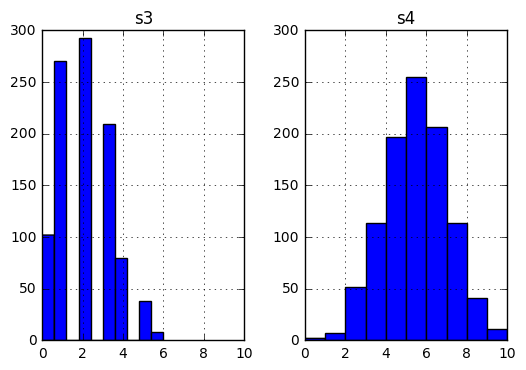

In [102]:
# create histograms of the two variables.
sample_1000.hist(layout=(1, 2), sharex=True)
plt.show()

In [103]:
# Calculate differences in the means:
diff_4_3 = s4.mean() - s3.mean()
print(diff_4_3)

2.944


------------------

In [104]:
# decreasa the size of the sample to 20
np.random.seed(1)
s5 = np.random.choice( population1, size = 20 , replace=False )
s6 = np.random.choice( population2, size = 20 , replace=False )

print('mean:',s5.mean())
print('std:',s5.std())
print('mean:',s6.mean())
print('std:',s6.std())

mean: 1.9
std: 1.3
mean: 4.75
std: 1.3738631664


In [105]:
# Calculate differences in the means:
diff_6_5 = s6.mean() - s5.mean()
print(diff_6_5)

2.85


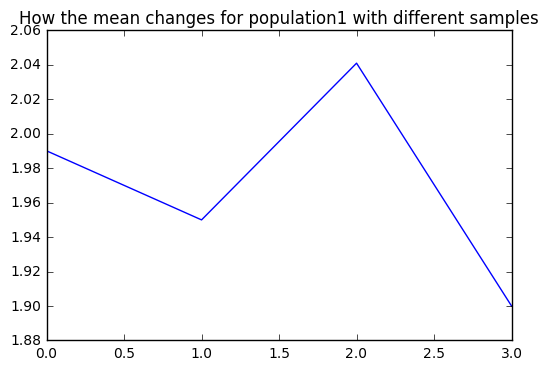

In [106]:
list_population1 = [population1.mean(),s1.mean(),s3.mean(),s5.mean()] #For population1 (p=0.2) / samples:10k,100,1000,20
list_population2 = [population2.mean(),s2.mean(),s4.mean(),s6.mean()] #For population2 (p=0.5) / samples:10k,100,1000,20

plt.plot(list_population1)
plt.title('How the mean changes for population1 with different samples')
plt.show()

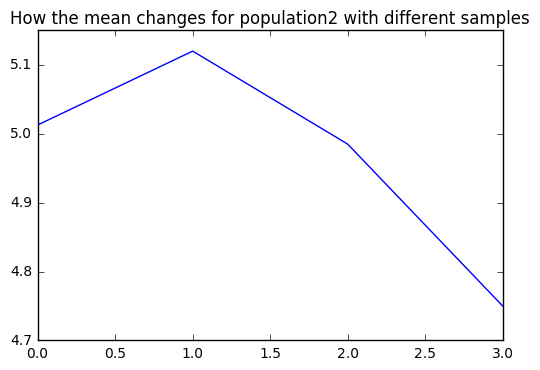

In [107]:
plt.plot(list_population2)
plt.title('How the mean changes for population2 with different samples')
plt.show()

Some samples are more skewed and even if you extract a bigger sample it does not mean that your mean gets closer to the population mean.

------------------

2.Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [111]:
# p = the probability of getting k successes during n repetitions of the event
# p = 0.3 for pop1
np.random.seed(1)
population1 = np.random.binomial( n=10,p=0.3, size = 10000 )
population2 = np.random.binomial( n=10,p=0.5, size = 10000 )

print('mean pop1:',population1.mean())
print('std pop1:',population1.std(ddof=0))


mean pop1: 2.9895
std pop1: 1.4367984375


In [115]:
sample1 = np.random.choice(population1, 100, replace=True)
sample2 = np.random.choice(population2, 100, replace=True)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=6.3967699656096517, pvalue=1.1232869895083174e-09)


In [116]:
# p = 0.4 for pop1
np.random.seed(1)
population1 = np.random.binomial( n=10,p=0.4, size = 10000 )
population2 = np.random.binomial( n=10,p=0.5, size = 10000 )

sample1 = np.random.choice(population1, 100, replace=True)
sample2 = np.random.choice(population2, 100, replace=True)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=5.3286330462204257, pvalue=2.6797806834666642e-07)


Random samples taken from a population with binomial distribution where p differs (p= the probability of getting k successes during n repetitions of the event) show that by applying the t-test their means are different and the differences did not occur by chance (a very low p-value less than 5%).

Also looking at how t-test varies we can say that as the differences between samples get smaller (p goes from 0.2 to 0.4 which is closer to 0.5) the t-test gets smaller:
- the t-test = 16.54 for two samples of 100 items, one with p=0.2 and the other with p=0.5
- the t-test =  6.41 for two samples of 100 items, one with p=0.3 and the other with p=0.5
- the t-test =  5.33 for two samples of 100 items, one with p=0.4 and the other with p=0.5


-----------------

3.If distributions are not normal we can use Mann-Whitney-Wilcoxon parametric test.

However, the Central Limit Theorem comes to the rescue and says that no matter the non-normality of the distributions we take many samples and generate the a sample of the sample means for which we can apply the t-test.